<a href="https://colab.research.google.com/github/e233826/CNG-562/blob/master/Pakzad_malaria_cell_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!wget https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip  -d /content
!unzip /content/cell_images.zip -d /content/

cell_images.zip     100%[===================>] 337.08M  41.2MB/s    in 8.8s    

2019-05-18 14:54:03 (38.2 MB/s) - ‘cell_images.zip’ saved [353452851/353452851]

URI encoding = ‘UTF-8’
/content: Scheme missing.
FINISHED --2019-05-18 14:54:03--
Total wall clock time: 9.2s
Downloaded: 1 files, 337M in 8.8s (38.2 MB/s)
Saving HSTS entries to /root/.wget-hsts
Archive:  /content/cell_images.zip
   creating: /content/cell_images/
   creating: /content/cell_images/Parasitized/
 extracting: /content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png  
 extracting: /content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png  
 extracting: /content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png  
 extracting: /content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png  
 extracting: /content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png  
 extracting: /content/cell_images/Parasitized/C100P61Th

In [0]:
from keras.preprocessing.image import ImageDataGenerator

directory_td = "/content/cell_images"

dgenerator = ImageDataGenerator(rescale=1./255,
                             rotation_range=3,
                             validation_split=0.2)
tgenerator = dgenerator.flow_from_directory(directory_td,
                                            target_size=(70, 70),
                                            batch_size=50)
vgenerator = dgenerator.flow_from_directory(directory_td,
                                            target_size=(70, 70),
                                            batch_size=50)

Using TensorFlow backend.


Found 27558 images belonging to 2 classes.
Found 27558 images belonging to 2 classes.


In [0]:
import keras
from keras import layers
from keras import Sequential

cnn = Sequential()

cnn.add(layers.Conv2D(64,(3,3),input_shape=(70, 70, 3)))
cnn.add(layers.Conv2D(64,(3,3)))
cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn.add(layers.Dropout(0.2))

cnn.add(layers.Conv2D(128,(3,3)))
cnn.add(layers.Conv2D(128,(3,3)))
cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn.add(layers.Dropout(0.2))

cnn.add(layers.Conv2D(254,(3,3)))
cnn.add(layers.Conv2D(254,(3,3)))
cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn.add(layers.Dropout(0.2))

cnn.add(layers.Flatten())
cnn.add(layers.Dense(50, activation='relu',name='HL1'))
cnn.add(layers.Dropout(0.2))
cnn.add(layers.Dense(40, activation='relu',name='HL2'))
cnn.add(layers.Dense(2, activation='softmax',name='HL3'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
from keras import optimizers
cnn.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.SGD(lr=1e-5),
                  metrics=['acc'])


In [0]:
cnn_history = cnn.fit_generator(tgenerator,
                                steps_per_epoch=100,
                                epochs=10,validation_data=vgenerator,
                                validation_steps=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
100/100 [==============================] - 500s 5s/step - loss: 0.6992 - acc: 0.4936 - val_loss: 0.6902 - val_acc: 0.5148
Epoch 2/10
100/100 [==============================] - 467s 5s/step - loss: 0.7002 - acc: 0.5054 - val_loss: 0.6907 - val_acc: 0.5084
Epoch 3/10
100/100 [==============================] - 466s 5s/step - loss: 0.6989 - acc: 0.5034 - val_loss: 0.6909 - val_acc: 0.5106
Epoch 4/10
100/100 [==============================] - 460s 5s/step - loss: 0.6996 - acc: 0.5104 - val_loss: 0.6904 - val_acc: 0.5208
Epoch 5/10
100/100 [==============================] - 464s 5s/step - loss: 0.7000 - acc: 0.4988 - val_loss: 0.6914 - val_acc: 0.5160
Epoch 6/10
100/100 [==============================] - 461s 5s/step - loss: 0.6992 - acc: 0.5073 - val_loss: 0.6900 - val_acc: 0.5256
Epoch 7/10
100/100 [==============================] - 463s 5s/step - loss: 0.6986 - acc: 0.5044 - val_loss: 0.6905 - val_acc: 0.5280
Epoch 8/10
100/100 [=

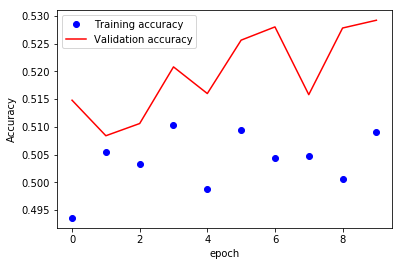

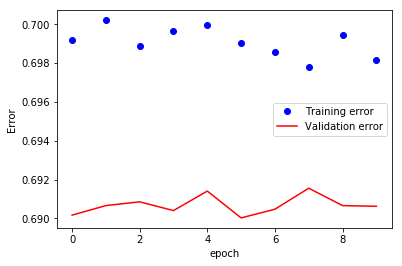

In [0]:
import matplotlib.pyplot as plt

epochs = range(len(cnn_history.history['acc']))

plt.plot(epochs, cnn_history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, cnn_history.history['val_acc'], 'r', label='Validation accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(loc="best")

plt.figure()
plt.plot(epochs, cnn_history.history['loss'], 'bo', label='Training error')
plt.plot(epochs, cnn_history.history['val_loss'], 'r', label='Validation error')
plt.xlabel('epoch')
plt.ylabel('Error')
plt.legend(loc="best")

plt.show()

In [0]:
from keras.applications import vgg19
convolution = vgg19.VGG19(weights='imagenet',
                          include_top=False,
                          input_shape=(70, 70, 3))


In [0]:
VGG= Sequential()
VGG.add(convolution)
VGG.add(layers.Flatten())
VGG.add(layers.Dense(50, activation='relu',name='HL1'))
VGG.add(layers.Dropout(0.2))
VGG.add(layers.Dense(40, activation='relu',name='HL2'))
VGG.add(layers.Dense(2, activation='softmax',name='HL3'))


In [0]:
VGG.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.SGD(lr=1e-5),
                  metrics=['acc'])

In [0]:
VGG_history = VGG.fit_generator(tgenerator,
                                steps_per_epoch=50,
                                epochs=10,validation_data=vgenerator,
                                validation_steps=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
50/50 [==============================] - 972s 19s/step - loss: 0.8784 - acc: 0.5176 - val_loss: 0.8174 - val_acc: 0.5036
Epoch 2/10
50/50 [==============================] - 967s 19s/step - loss: 0.8281 - acc: 0.5104 - val_loss: 0.7630 - val_acc: 0.5072
Epoch 3/10
50/50 [==============================] - 963s 19s/step - loss: 0.7943 - acc: 0.5008 - val_loss: 0.7360 - val_acc: 0.5020
Epoch 4/10
50/50 [==============================] - 966s 19s/step - loss: 0.7616 - acc: 0.5148 - val_loss: 0.7176 - val_acc: 0.5130
Epoch 5/10
50/50 [==============================] - 971s 19s/step - loss: 0.7498 - acc: 0.5116 - val_loss: 0.6891 - val_acc: 0.5508
Epoch 6/10
50/50 [==============================] - 969s 19s/step - loss: 0.7265 - acc: 0.5284 - val_loss: 0.6758 - val_acc: 0.5760
Epoch 7/10
50/50 [==============================] - 969s 19s/step - loss: 0.7092 - acc: 0.5488 - val_loss: 0.6652 - val_acc: 0.6050
Epoch 8/10
50/50 [==========

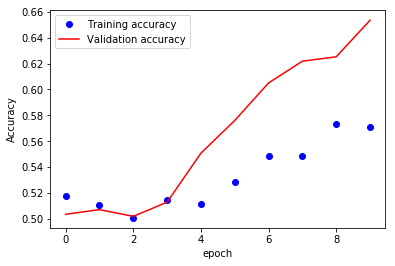

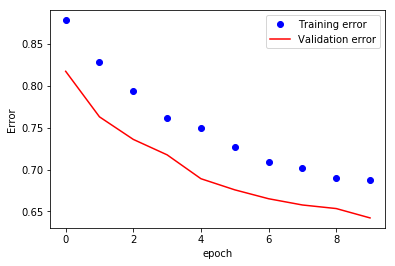

In [0]:
import matplotlib.pyplot as plt

epochs = range(len(VGG_history.history['acc']))

plt.plot(epochs, VGG_history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, VGG_history.history['val_acc'], 'r', label='Validation accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(loc="best")

plt.figure()
plt.plot(epochs, VGG_history.history['loss'], 'bo', label='Training error')
plt.plot(epochs, VGG_history.history['val_loss'], 'r', label='Validation error')
plt.xlabel('epoch')
plt.ylabel('Error')
plt.legend(loc="best")

plt.show()